<a href="https://colab.research.google.com/github/2000KruthiR/Devtern-Uber-Trips-Analysis/blob/main/Uber_Trips_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Uber Trips Analysis Steps
####  Import necessary libraries
####  Read the dataset using Pandas
####  Explore the dataset properties
####  Visualize the relationship between different variables and draw insights

## Step 1: Import Necessary Libraries

In [26]:
#To read the dataset
import pandas as pd

#For visualization
import matplotlib.pyplot as plt

## Step 2: Read the Dataset Using Pandas

In [2]:
#Read the dataset
uber= pd.read_csv("/content/uber-raw-data-sep14.csv")

#Display the first 5 records
uber.head(5)

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [3]:
#Display the last 5 records
uber.tail()

,Date/Time,Lat,Lon,Base
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764
1028135,9/30/2014 22:58:00,40.7140,-73.9496,B02764


In [4]:
#Find the shape of the dataset
uber.shape

(1028136, 4)

In [5]:
#Understand the dataset properties
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date/Time  1028136 non-null  object 
 1   Lat        1028136 non-null  float64
 2   Lon        1028136 non-null  float64
 3   Base       1028136 non-null  object 
dtypes: float64(2), object(2)
memory usage: 31.4+ MB


## Step 3: Explore the Dataset Properties

#### Let's break the Date/Time column to "Day", "Hour", & "Weekday".

In [6]:
#Change the "Date/Time" column's data type from string to datetime
uber['Date/Time']= pd.to_datetime(uber['Date/Time'])

#Convert "Date/Time" column from string data type into DateTime
uber["Day"] = uber["Date/Time"].apply(lambda x: x.day)
uber["Hour"] = uber["Date/Time"].apply(lambda x: x.hour)
uber["Weekday"] = uber["Date/Time"].apply(lambda x: x.weekday())
uber.head(5)

,Date/Time,Lat,Lon,Base,Day,Hour,Weekday
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0


## Step 4: Visualize the Relationship Between Different Variables and Draw Insights

#### Now we can check the density of rides according to days, hours, and weekdays

### Visualize the Density of rides per Day of month

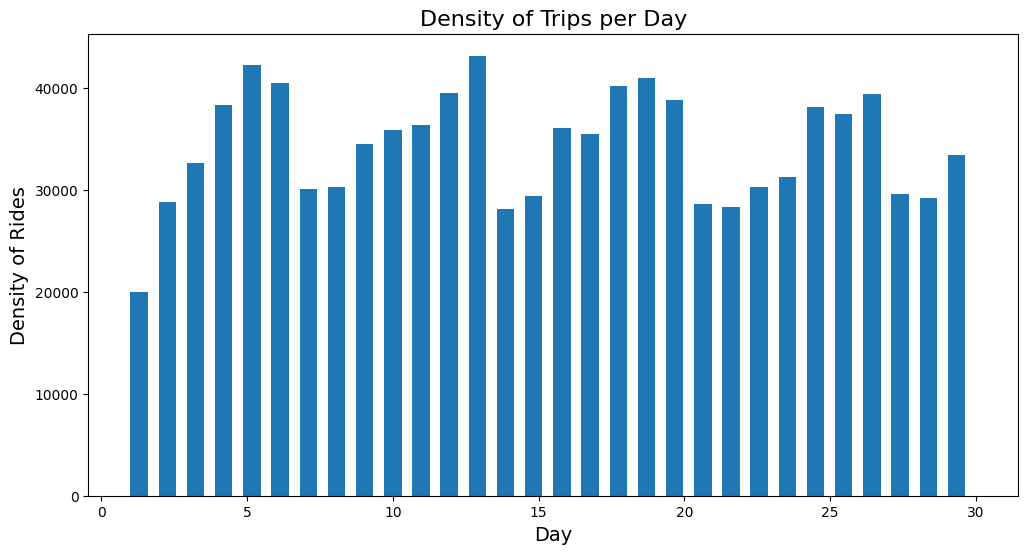

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.hist(uber.Day, width=0.6, bins=30)
plt.title("Density of Trips per Day", fontsize=16)
plt.xlabel("Day", fontsize=14)
plt.ylabel("Density of Rides", fontsize=14)
plt.show()

#### From the above plot we can notice that the highest number of rides are during working days (Monday to Friday), while the least number of rides are in weekends.

### Density of Rides per Weekday

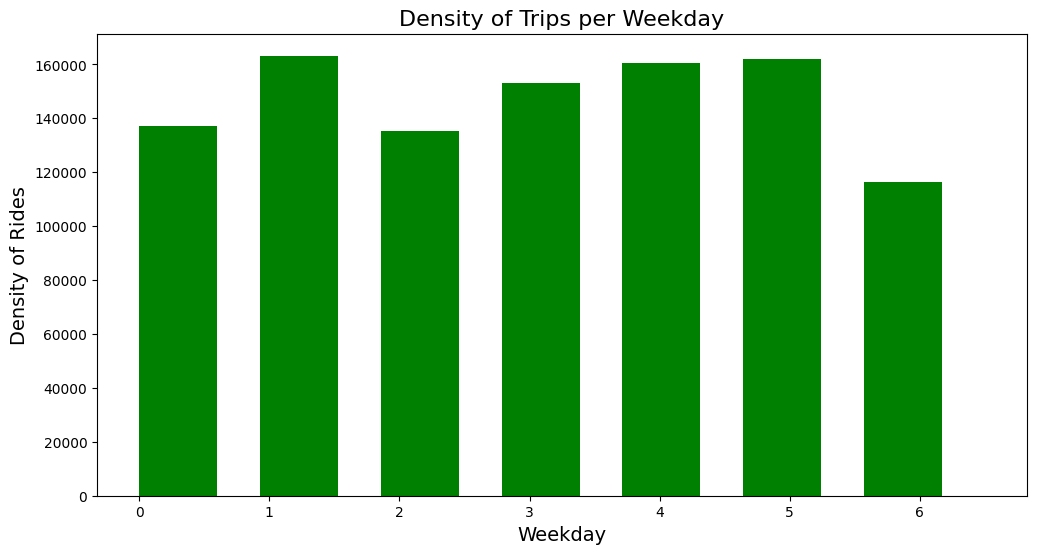

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.hist(uber.Weekday, width=0.6, range=(0, 6.5), bins=7, color="green")
plt.title("Density of Trips per Weekday", fontsize=16)
plt.xlabel("Weekday", fontsize=14)
plt.ylabel("Density of Rides", fontsize=14)
plt.show()

#### The busiest day in the week for Uber is Monday. On the other hand, Saturday is the day with the least number of rides.

### Density of Rides per Hour

Text(0, 0.5, 'Density of rides')

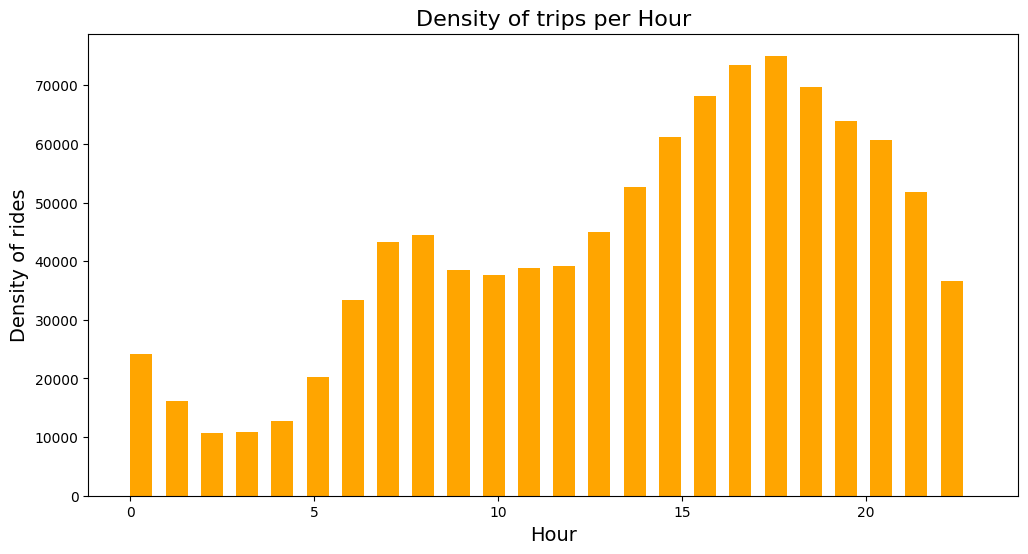

In [11]:
fig,ax = plt.subplots(figsize = (12,6))
plt.hist(uber.Hour, width= 0.6, bins=24, color= "orange")
plt.title("Density of trips per Hour", fontsize=16)
plt.xlabel("Hour", fontsize=14)
plt.ylabel("Density of rides", fontsize=14)

#### It seems like the number of rides decrease gradually from 1 AM to 4 PM and then increases starting from 5 AM onward till it reaches 6 PM which is the hour with the highest number of rides.

   ### Density of Rides per Location

Text(0, 0.5, 'Density of rides')

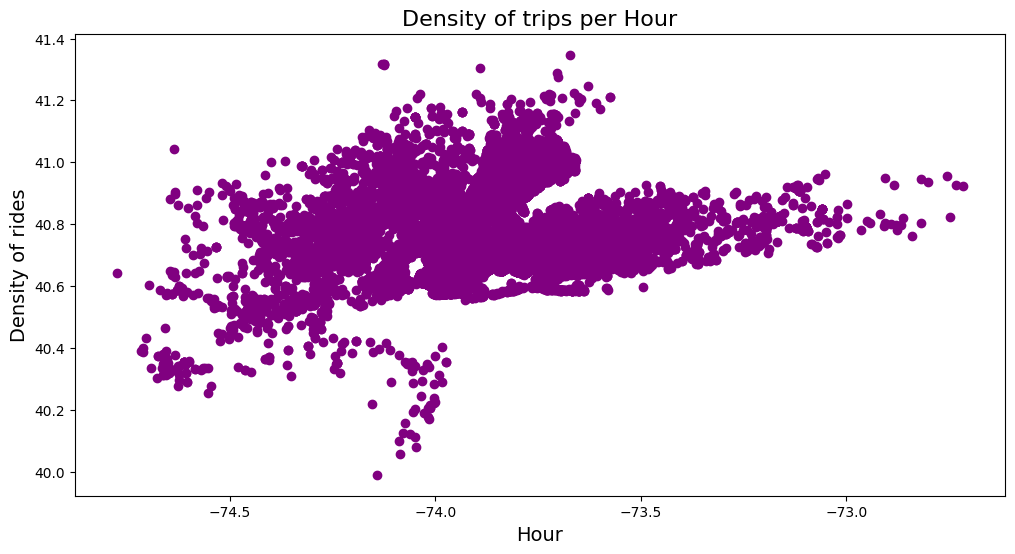

In [12]:
fig,ax = plt.subplots(figsize = (12,6))
x= uber.Lon
y= uber.Lat
plt.scatter(x, y, color= "purple")
plt.title("Density of trips per Hour", fontsize=16)
plt.xlabel("Hour", fontsize=14)
plt.ylabel("Density of rides", fontsize=14)

#### The region with the highest density of rides is near Manhattan and Newburgh. While the region with the lowest density is near New Jersey.


### Density of Rides per Month

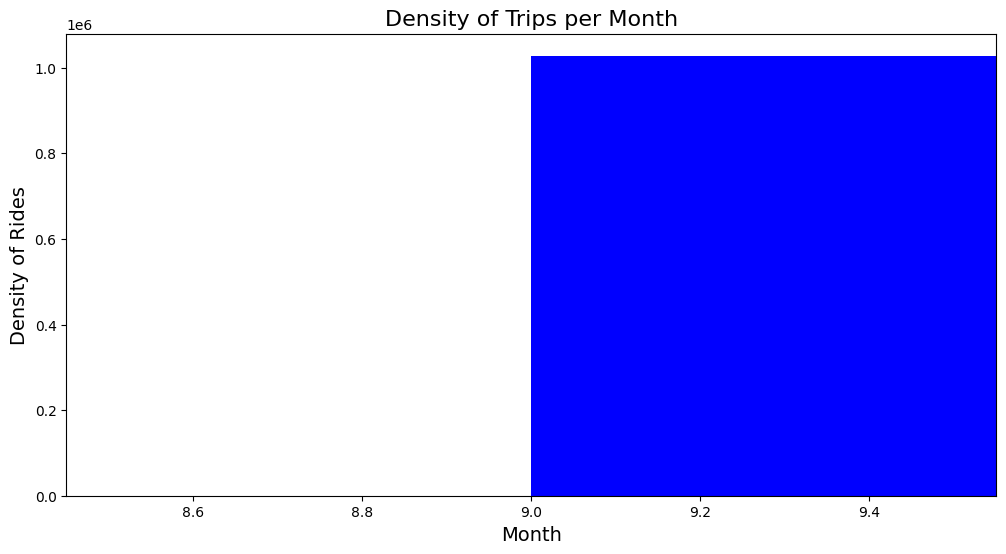

In [14]:
# Extract Month from Date/Time
uber["Month"] = uber["Date/Time"].apply(lambda x: x.month)

# Visualize the Density of Rides per Month
fig, ax = plt.subplots(figsize=(12, 6))
plt.hist(uber.Month, width=0.6, bins=12, color="blue")
plt.title("Density of Trips per Month", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Density of Rides", fontsize=14)
plt.show()

Since the dataset only contains data from September, all rides are in the same month.

### Heatmap of Rides per Weekday and Hour

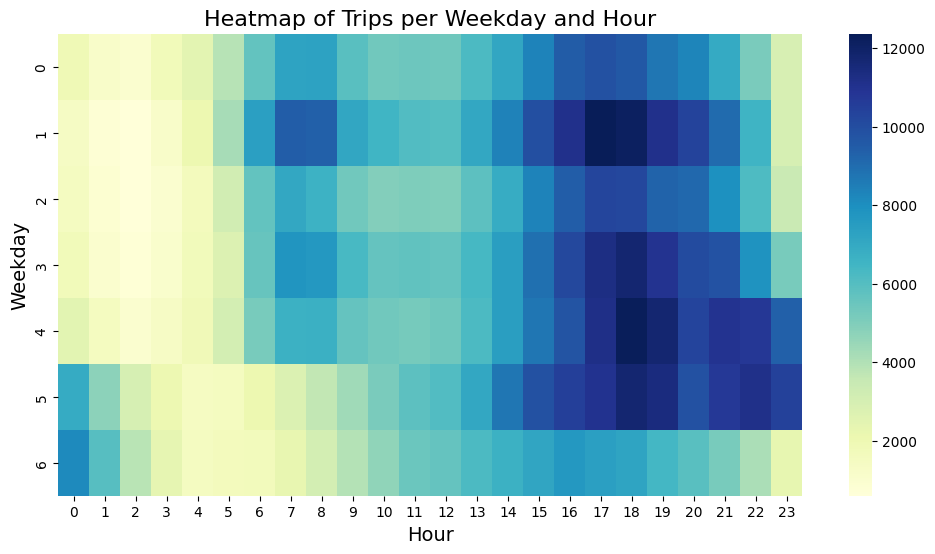

In [15]:
import seaborn as sns

# Create a pivot table with Weekday and Hour
heatmap_data = uber.pivot_table(index="Weekday", columns="Hour", values="Base", aggfunc="count")

# Visualize the Heatmap
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", ax=ax)
plt.title("Heatmap of Trips per Weekday and Hour", fontsize=16)
plt.xlabel("Hour", fontsize=14)
plt.ylabel("Weekday", fontsize=14)
plt.show()


This bar plot will show the distribution of rides across different bases.

### Pair Plot

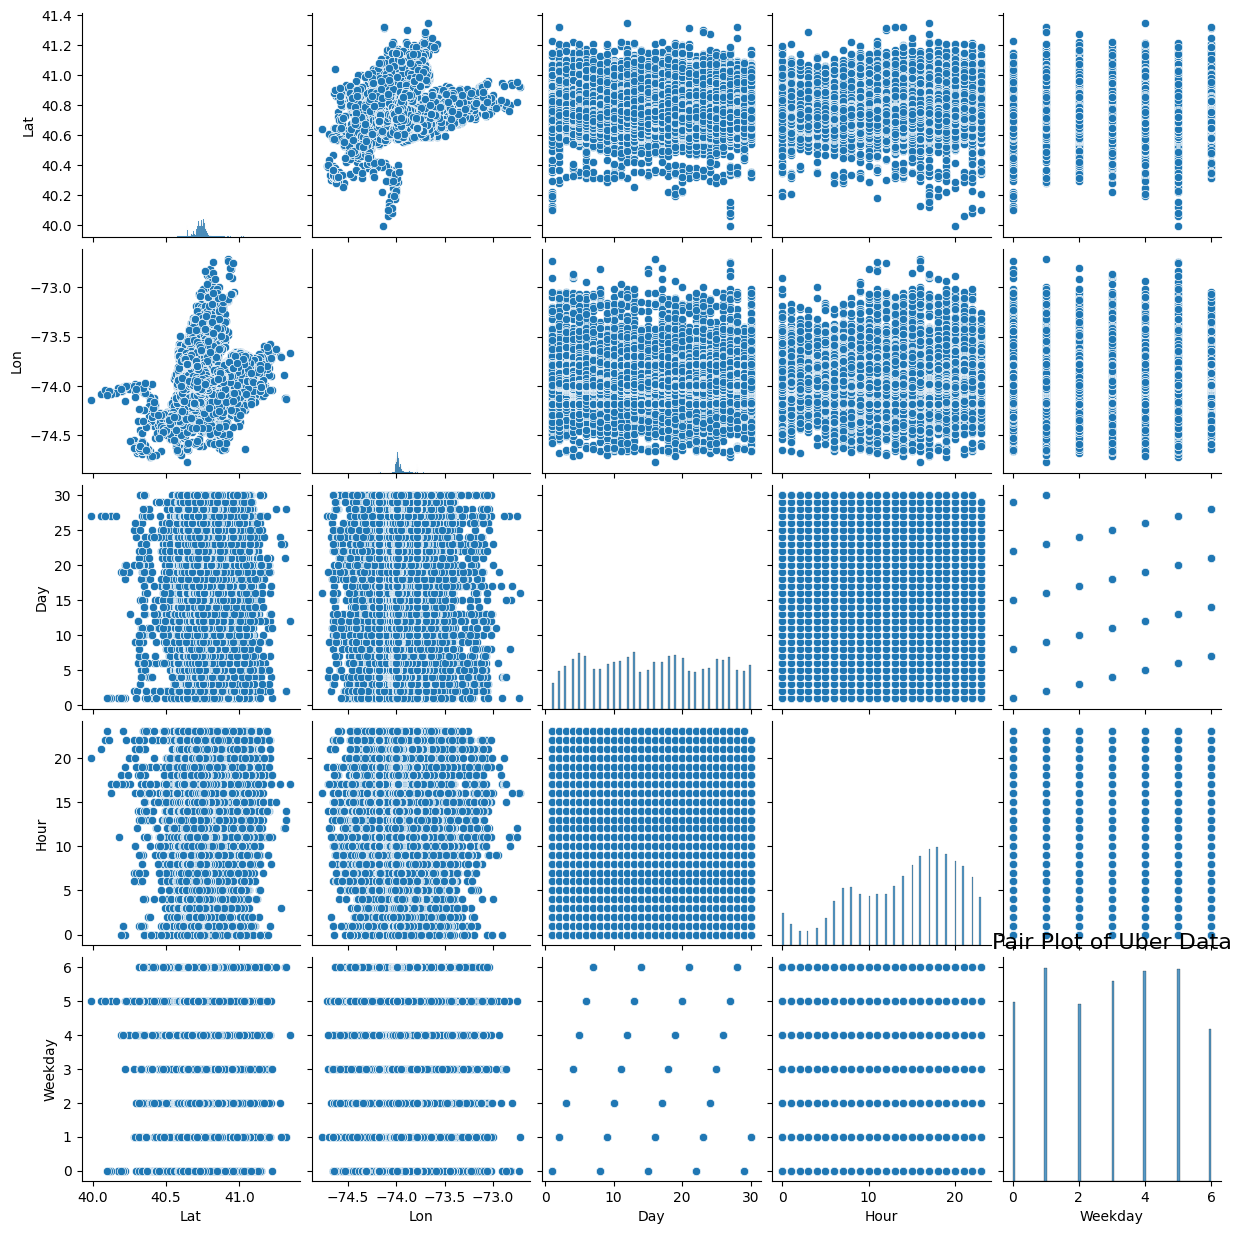

In [18]:
# Pair Plot of the Data
sns.pairplot(uber[['Lat', 'Lon', 'Day', 'Hour', 'Weekday']])
plt.title("Pair Plot of Uber Data", fontsize=16)
plt.show()

The pair plot provides a grid of plots to understand the relationships between pairs of features in the dataset.

### Rides Distribution by Latitude and Longitude

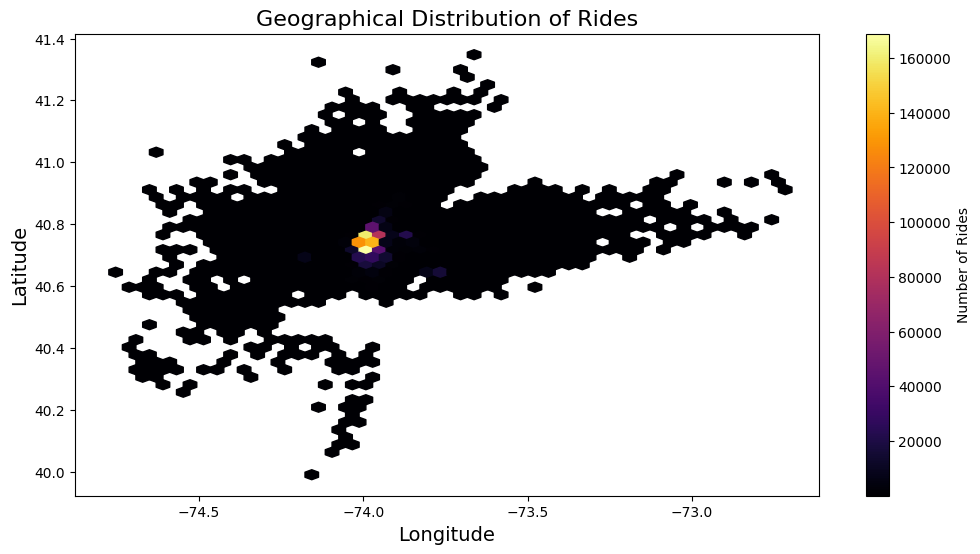

In [19]:
# Visualize the Distribution of Rides by Latitude and Longitude
plt.figure(figsize=(12, 6))
plt.hexbin(uber['Lon'], uber['Lat'], gridsize=50, cmap='inferno', mincnt=1)
plt.colorbar(label='Number of Rides')
plt.title("Geographical Distribution of Rides", fontsize=16)
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.show()

The hexbin plot will show the density of rides in different geographical areas.

### Box Plot of Rides by Hour

<ipython-input-21-e6dc13b06910>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Hour', y='Day', data=uber, palette='coolwarm')


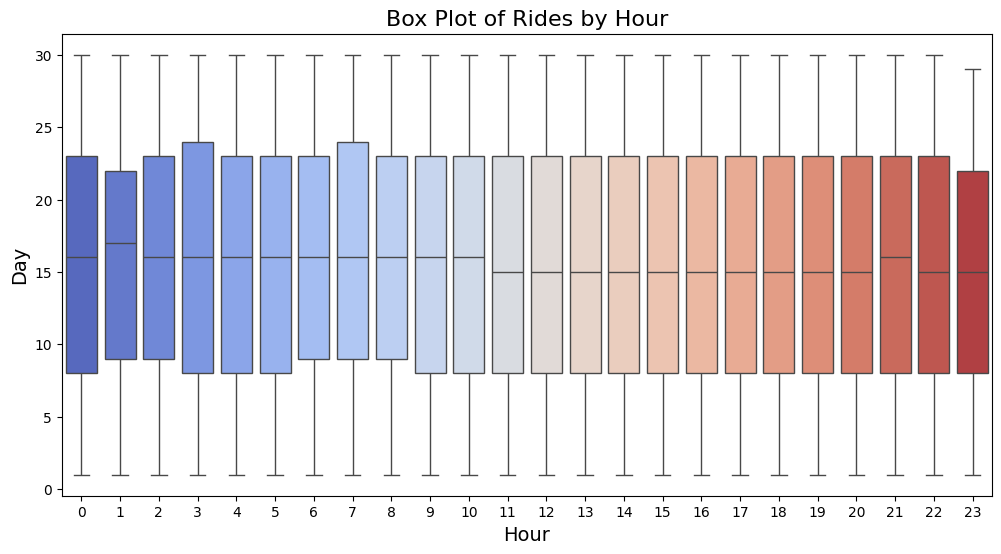

In [21]:
# Box Plot of Rides by Hour
plt.figure(figsize=(12, 6))
sns.boxplot(x='Hour', y='Day', data=uber, palette='coolwarm')
plt.title("Box Plot of Rides by Hour", fontsize=16)
plt.xlabel("Hour", fontsize=14)
plt.ylabel("Day", fontsize=14)
plt.show()

The box plot helps to visualize the distribution of rides and detect outliers across different hours.

### Violin Plot of Rides by Weekday

<ipython-input-22-d3fc76ea33aa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Weekday', y='Hour', data=uber, palette='viridis')


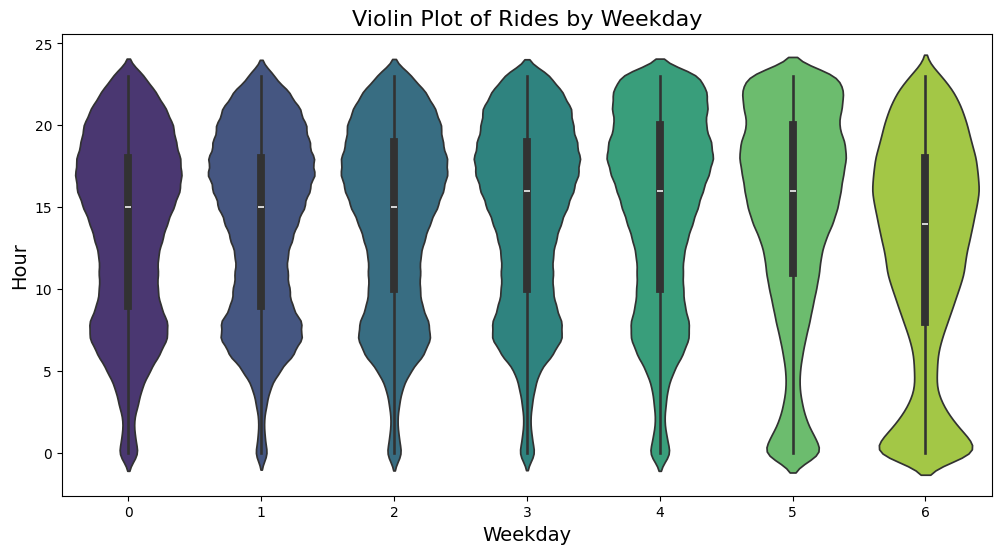

In [22]:
# Violin Plot of Rides by Weekday
plt.figure(figsize=(12, 6))
sns.violinplot(x='Weekday', y='Hour', data=uber, palette='viridis')
plt.title("Violin Plot of Rides by Weekday", fontsize=16)
plt.xlabel("Weekday", fontsize=14)
plt.ylabel("Hour", fontsize=14)
plt.show()

The violin plot shows the distribution and density of rides, highlighting the variation and concentration.

### Line Plot of Average Rides per Hour

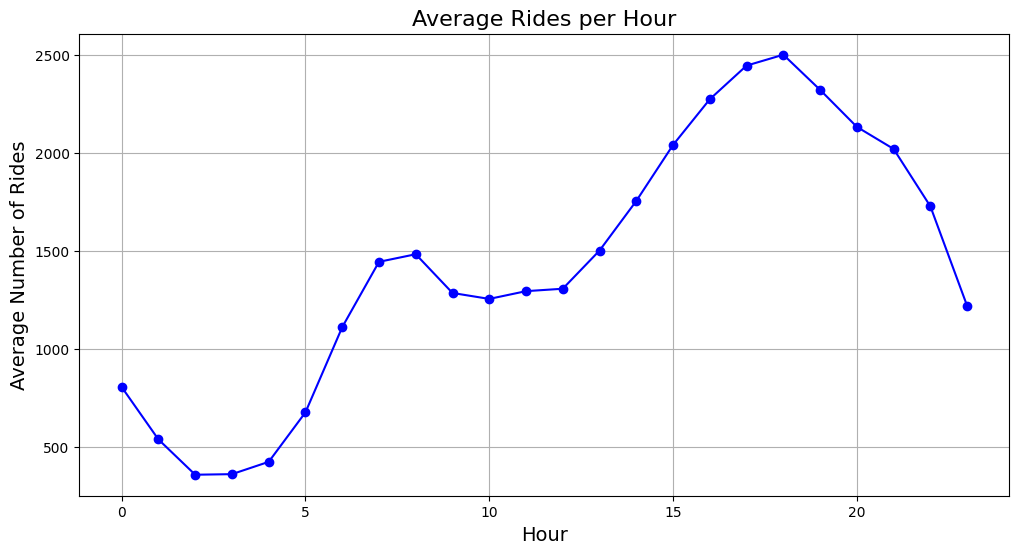

In [23]:
# Compute the Average Rides per Hour
average_rides_per_hour = uber.groupby('Hour').size() / uber['Day'].nunique()

# Line Plot of Average Rides per Hour
plt.figure(figsize=(12, 6))
average_rides_per_hour.plot(kind='line', marker='o', color='b')
plt.title("Average Rides per Hour", fontsize=16)
plt.xlabel("Hour", fontsize=14)
plt.ylabel("Average Number of Rides", fontsize=14)
plt.grid(True)
plt.show()

The line plot shows the average number of rides for each hour, revealing peak and off-peak hours.

### Aggregated Heatmap for Rides

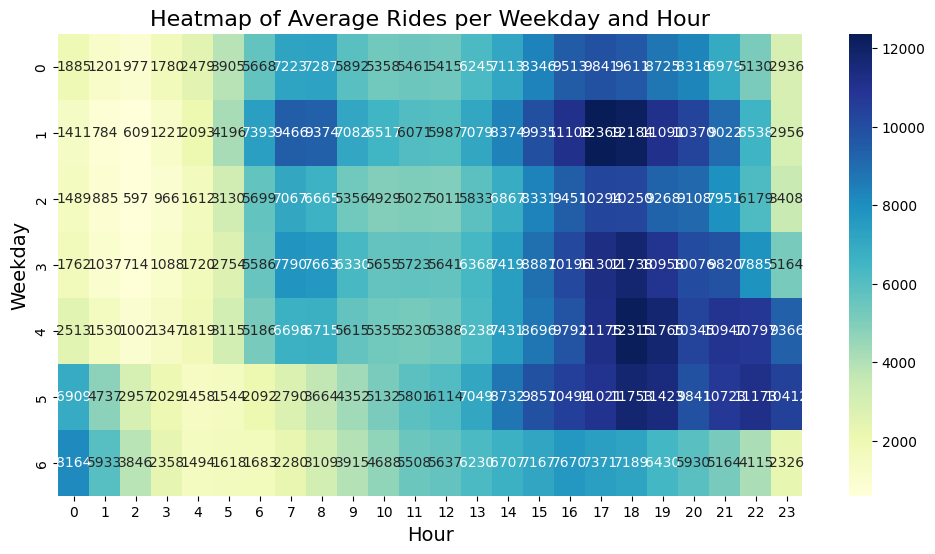

In [24]:
# Create a Pivot Table for Average Rides per Weekday and Hour
pivot_table = uber.pivot_table(index='Weekday', columns='Hour', values='Base', aggfunc='count')

# Aggregated Heatmap for Rides
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='g')
plt.title("Heatmap of Average Rides per Weekday and Hour", fontsize=16)
plt.xlabel("Hour", fontsize=14)
plt.ylabel("Weekday", fontsize=14)
plt.show()


This heatmap shows the average number of rides for each combination of weekday and hour, highlighting periods of high and low demand.